# <font color="brown">Vaccine Prediction<font>
Made by Ethan D'Mello 
    
- Project ID: PRCP-1014-VaccinePred
- Team ID: PTID-CDS-JUN22-1323A

Hosted by Drivendata
https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/

# <font color="brown"> Overview <font>
    
- Can you predict whether people got H1N1 and seasonal flu vaccines using information they shared about their backgrounds, opinions, and health behaviors?
In this challenge, we will take a look at vaccination, a key public health measure used to fight infectious diseases. Vaccines provide immunization for individuals, and enough immunization in a community can further reduce the spread of diseases through "herd immunity."

    
- As of the launch of this competition, vaccines for the COVID-19 virus are still under development and not yet available. The competition will instead revisit the public health response to a different recent major respiratory disease pandemic. Beginning in spring 2009, a pandemic caused by the H1N1 influenza virus, colloquially named "swine flu," swept across the world. Researchers estimate that in the first year, it was responsible for between 151,000 to 575,000 deaths globally.


- A vaccine for the H1N1 flu virus became publicly available in October 2009. In late 2009 and early 2010, the United States conducted the National 2009 H1N1 Flu Survey. This phone survey asked respondents whether they had received the H1N1 and seasonal flu vaccines, in conjunction with questions about themselves. These additional questions covered their social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission. A better understanding of how these characteristics are associated with personal vaccination patterns can provide guidance for future public health efforts.

    
- Data is provided courtesy of the United States National Center for Health Statistics.
U.S. Department of Health and Human Services (DHHS). National Center for Health Statistics. The National 2009 H1N1 Flu Survey. Hyattsville, MD: Centers for Disease Control and Prevention, 2012.
Images courtesy of the U.S. Navy and the Fort Meade Public Affairs Office via Flickr under the CC BY 2.0 license

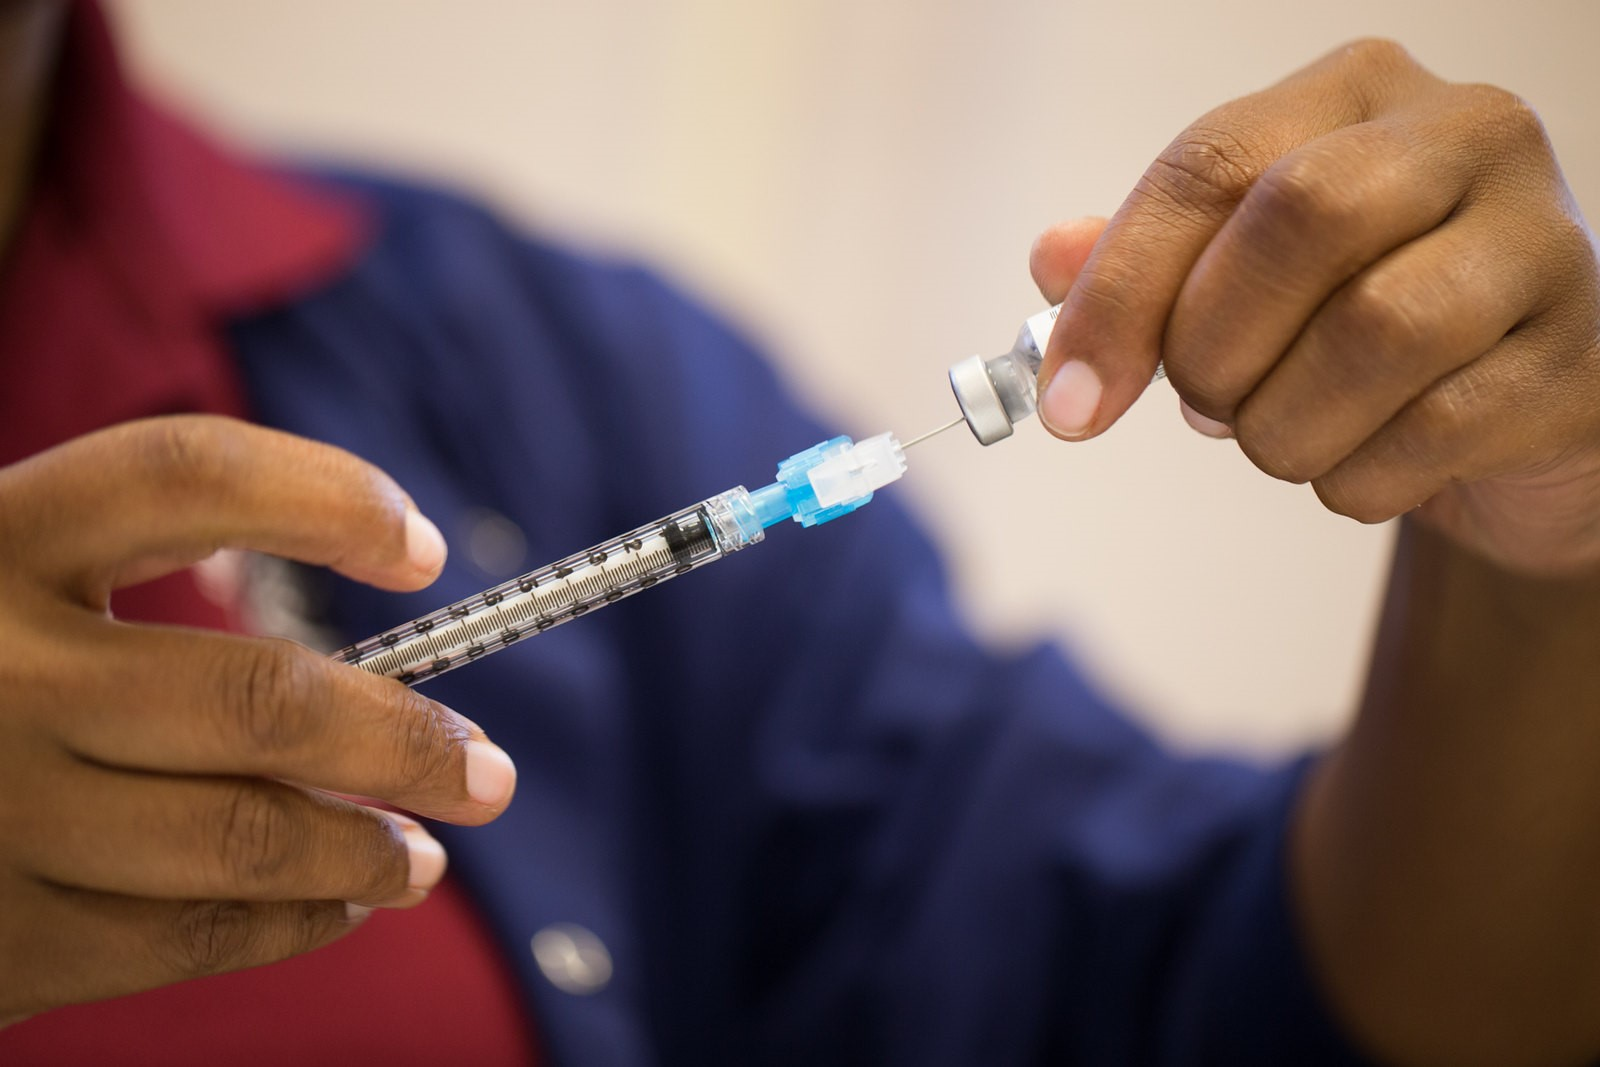


# <font color="brown">Predicting if a Person has H1N1 and seasonal vaccine<font>

Using Machine Learning and various data science libraries to build a model that can reliably predict if a person will have H1N1 and seasonal vaccine. We will use the following pipeline to create a reliable model:

- Problem Definition
- Data
- Evaluvation
- Features
- Modelling

# <font color="brown">Problem Definition <font>

#### Preparing the tools

# <font color="brown">Data <font>
    
    
We are provided a dataset with 36 columns. The first column respondent_id is a unique and random identifier. The remaining 35 features are described below:
    
    
For all binary variables: 0 = No; 1 = Yes.
- ***h1n1_concern*** - Level of concern about the H1N1 flu.
( 0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.)
- ***h1n1_knowledge*** - Level of knowledge about H1N1 flu.(0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.)
- ***behavioral_antiviral_meds*** - Has taken antiviral medications. (binary)
- ***behavioral_avoidance*** - Has avoided close contact with others with flu-like symptoms. (binary)
- ***behavioral_face_mask*** - Has bought a face mask. (binary)
- ***behavioral_wash_hands*** - Has frequently washed hands or used hand sanitizer. (binary)
- ***behavioral_large_gatherings*** - Has reduced time at large gatherings. (binary)
- ***behavioral_outside_home*** - Has reduced contact with people outside of own household. (binary)
- ***behavioral_touch_face*** - Has avoided touching eyes, nose, or mouth. (binary)
- ***doctor_recc_h1n1*** - H1N1 flu vaccine was recommended by doctor. (binary)
- ***doctor_recc_seasonal*** - Seasonal flu vaccine was recommended by doctor. (binary)
- ***chronic_med_condition*** - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
    
    
- ***child_under_6_months*** - Has regular close contact with a child under the age of six months. (binary)
- ***health_worker*** - Is a healthcare worker. (binary)
- ***health_insurance*** - Has health insurance. (binary)
- ***opinion_h1n1_vacc_effective*** - Respondent's opinion about H1N1 vaccine effectiveness.
( 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.)
- ***opinion_h1n1_risk*** - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
( 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high. )
- ***opinion_h1n1_sick_from_vacc*** - Respondent's worry of getting sick from taking H1N1 vaccine.
( 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried. )
- ***opinion_seas_vacc_effective*** - Respondent's opinion about seasonal flu vaccine effectiveness.
( 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.)
- ***opinion_seas_risk*** - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
( 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.)
- ***opinion_seas_sick_from_vacc*** - Respondent's worry of getting sick from taking seasonal flu vaccine.
( 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.)
    
    
- ***age_group*** - Age group of respondent.
- ***education*** - Self-reported education level.
- ***race*** - Race of respondent.
- ***sex*** - Sex of respondent.
- ***income_poverty*** - Household annual income of respondent with respect to 2008 Census poverty thresholds.
- ***marital_status*** - Marital status of respondent.
- ***rent_or_own*** - Housing situation of respondent.
- ***employment_status*** - Employment status of respondent.
- ***hhs_geo_region*** - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
    
    
- ***census_msa*** - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
- ***household_adults*** - Number of other adults in household, top-coded to 3.
- ***household_children*** - Number of children in household, top-coded to 3.
- ***employment_industry*** - Type of industry respondent is employed in. Values are represented as short random character strings.
- ***employment_occupation*** - Type of occupation of respondent. Values are represented as short random character strings.


### Setting up the tools


In [638]:
# All the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Get rid of all the warnings
import warnings 
warnings.filterwarnings('ignore')

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# To convert categorical data into numerical data
from sklearn.preprocessing import LabelEncoder

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve,roc_auc_score
from scipy import stats

### Dataset

In [639]:
df = pd.read_csv(r'C:\Users\ethan\Documents\CDS\Project[Internship]\PRCP-1014-VaccinePred\features.csv')
df_extra_column = pd.read_csv(r'C:\Users\ethan\Documents\CDS\Project[Internship]\PRCP-1014-VaccinePred\labels.csv')
df = df.join(df_extra_column['h1n1_vaccine'])
df = df.join(df_extra_column['seasonal_vaccine'])

In [640]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [641]:
df_extra_column.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data checks

In [642]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [643]:
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


### Deleting the Null values

In [644]:
df.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [645]:
df = df.dropna(axis=0, how="any")

In [646]:
df.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

### Converting categorical data into binary data
Before we performed the following changes , these values were replaced with more easily accessable values. 

In [647]:
#For example <= $75,000  was replaced by += $75,000

#### Age group

In [648]:
#age_group to age
df.age_group.unique()

array(['35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '18 - 34 Years',
       '65+ Years'], dtype=object)

In [649]:
df.age_group.head()

1     35 - 44 Years
7     45 - 54 Years
10    45 - 54 Years
11    55 - 64 Years
15    35 - 44 Years
Name: age_group, dtype: object

In [650]:
#let '18 - 34 Years' -> 0 , '35 - 44 Years' -> 1 , '45 - 54 Years'-> 2 , '55 - 64 Years' -> 3 and '65+ Years' -> 4.
le = LabelEncoder()
label = le.fit_transform(df['age_group'])
df.age_group = label
df.age_group

1        1
7        2
10       2
11       3
15       1
        ..
26681    0
26683    3
26690    2
26699    2
26703    0
Name: age_group, Length: 6437, dtype: int32

#### Education

In [651]:
df.education

1                12 Years
7            Some College
10               12 Years
11       College Graduate
15       College Graduate
               ...       
26681    College Graduate
26683    College Graduate
26690    College Graduate
26699        Some College
26703    College Graduate
Name: education, Length: 6437, dtype: object

In [652]:
le = LabelEncoder()
label = le.fit_transform(df['education'])
df.education = label 
df.education

1        0
7        3
10       0
11       2
15       2
        ..
26681    2
26683    2
26690    2
26699    3
26703    2
Name: education, Length: 6437, dtype: int32

#### Race

In [653]:
df.race

1           White
7           White
10          White
11          White
15          White
           ...   
26681       White
26683       White
26690    Hispanic
26699       White
26703       White
Name: race, Length: 6437, dtype: object

In [654]:
le = LabelEncoder()
label = le.fit_transform(df['race'])
df.race = label 
df.race

1        3
7        3
10       3
11       3
15       3
        ..
26681    3
26683    3
26690    1
26699    3
26703    3
Name: race, Length: 6437, dtype: int32

#### Other Data

In [655]:
column_list= [ 'sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa', 'employment_industry','employment_occupation']
for data in column_list:
    le = LabelEncoder()
    label = le.fit_transform(df[data])
    df[data] = label 

In [656]:
df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1,0,1,0,0.0,0.0,12,19,0,1
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,0,1,2,2.0,0.0,12,20,1,1
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,0,6,0,2.0,0.0,19,13,1,1
11,11,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,8,2,1.0,2.0,19,1,1,1
15,15,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,6,0,1.0,3.0,18,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26681,26681,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,0,5,0,1.0,0.0,0,0,0,0
26683,26683,1.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0,0,3,0,1.0,0.0,4,2,1,1
26690,26690,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,7,1,2.0,1.0,7,11,0,0
26699,26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,9,0,1.0,0.0,12,19,0,0


### Renaming the values

In [657]:
df.rename(columns = { 
    'respondent_id' : 'id' ,
    'h1n1_concern' : 'hc',
    'h1n1_knowledge' : 'hk',
    'behavioral_antiviral_meds' : 'bam',
    'behavioral_avoidance' : 'ba',
    'behavioral_face_mask' : 'bfm',
    'behavioral_wash_hands' : 'bwh',
    'behavioral_large_gatherings' : 'blg',
    'behavioral_outside_home' : 'boh',
    'behavioral_touch_face' : 'btf',
    'doctor_recc_h1n1' : 'drh',
    'doctor_recc_seasonal' : 'drs',
    'chronic_med_condition' : 'cmc',
    'child_under_6_months' : 'cusm',
    'health_worker' : 'hw',
    'health_insurance' : 'hi',
    'opinion_h1n1_vacc_effective' :'ohve',
    'opinion_h1n1_risk' : 'ohr',
    'opinion_h1n1_sick_from_vacc' : 'ohsfv',
    'opinion_seas_vacc_effective' : 'osve',
    'opinion_seas_risk' : 'osr',
    'opinion_seas_sick_from_vacc' : 'ossfv',
    'age_group' : 'ag',
    'education' : 'ed',
    'race' : 'race',
    'sex' : 'sex',
    'income_poverty' : 'ip',
    'marital_status' : 'ms',
    'rent_or_own' : 'roo',
    'employment_status' : 'es',
    'hhs_geo_region' : 'hgr',
    'census_msa' : 'cm',
    'household_adults' : 'houa',
    'household_children' : 'houc',
    'employment_industry' : 'ei',
    'employment_occupation' : 'eo',
    'h1n1_vaccine' : 'target1' ,
    'seasonal_vaccine' : 'target2',

}, inplace= True)
df

,id,hc,hk,bam,ba,bfm,bwh,blg,boh,btf,...,roo,es,hgr,cm,houa,houc,ei,eo,target1,target2
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1,0,1,0,0.0,0.0,12,19,0,1
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,0,1,2,2.0,0.0,12,20,1,1
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,0,6,0,2.0,0.0,19,13,1,1
11,11,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,8,2,1.0,2.0,19,1,1,1
15,15,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,6,0,1.0,3.0,18,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26681,26681,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,0,5,0,1.0,0.0,0,0,0,0
26683,26683,1.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0,0,3,0,1.0,0.0,4,2,1,1
26690,26690,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,7,1,2.0,1.0,7,11,0,0
26699,26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,9,0,1.0,0.0,12,19,0,0


In [658]:
df.es.unique()

array([0])

# <font color="brown">Evaluvation <font>
We will evaluvate the data.

### Exploratory Data Analysis
We will perform two types of analysis:
- Univariate Analysis
- Bivariate Analysis 

### Univariate analysis

#### H1C1 concern

Text(0, 0.5, 'Number of People')

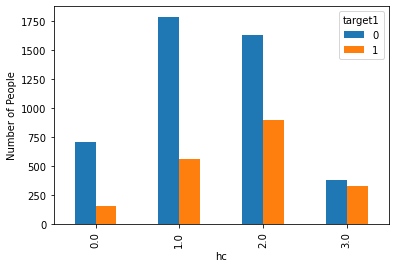

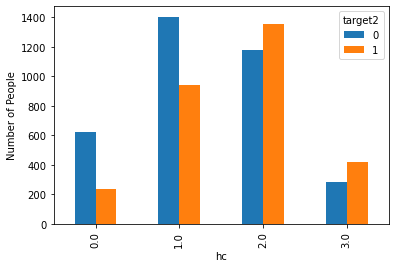

In [659]:
pd.crosstab(df.hc , df.target1).plot(kind="bar")
plt.ylabel('Number of People')
pd.crosstab(df.hc , df.target2).plot(kind="bar")
plt.ylabel('Number of People')

#### Other Data

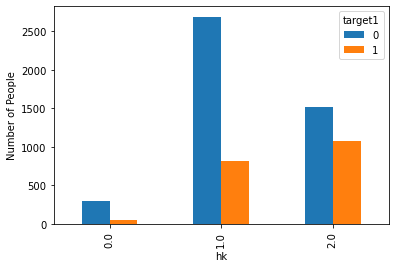

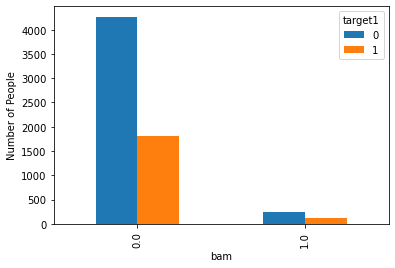

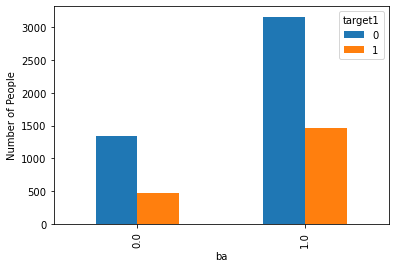

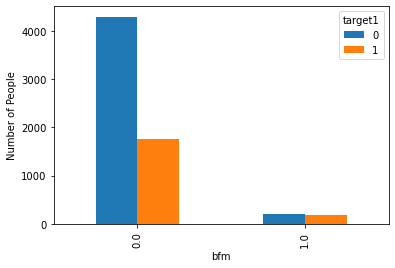

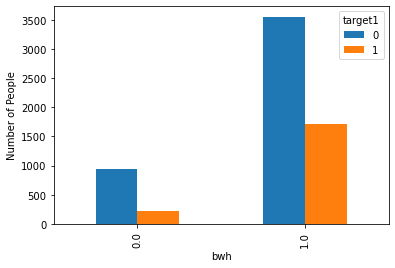

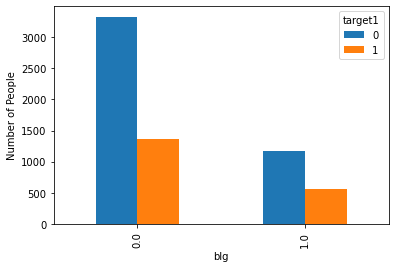

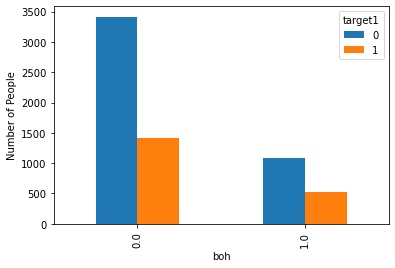

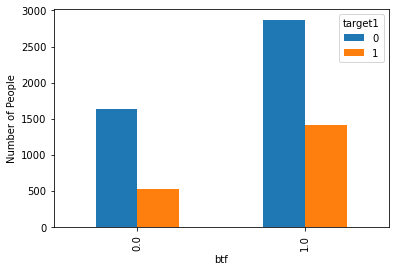

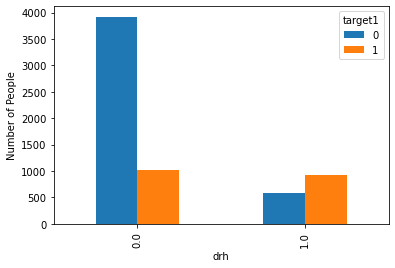

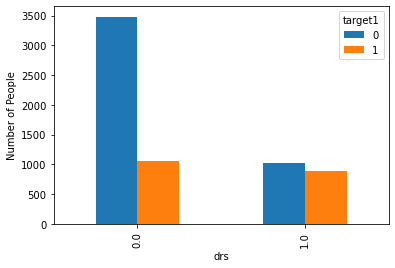

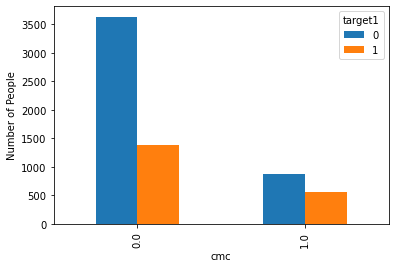

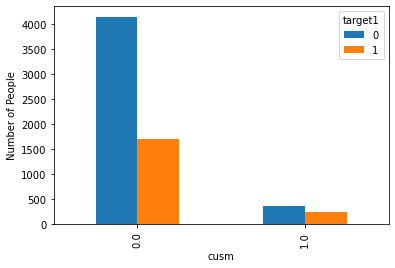

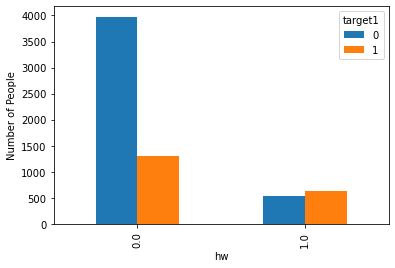

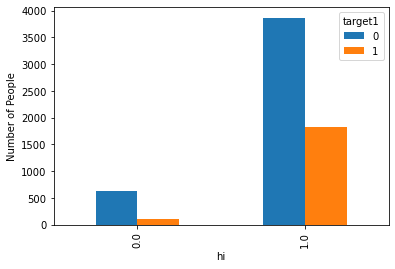

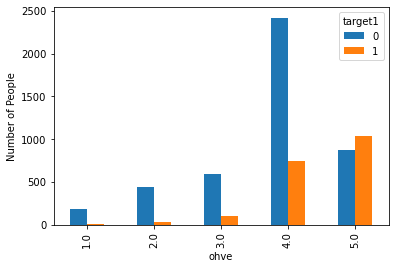

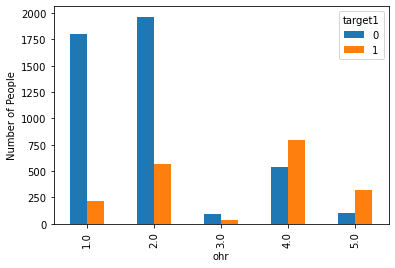

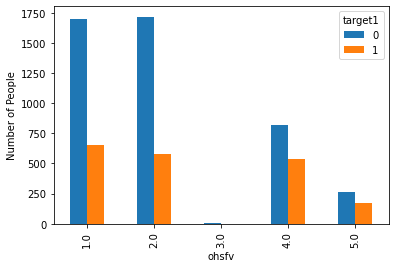

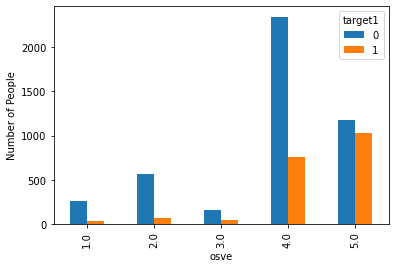

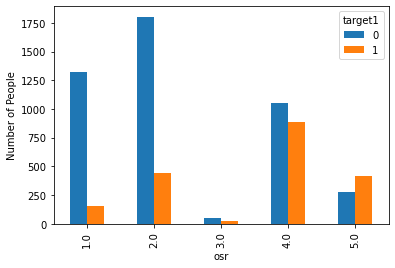

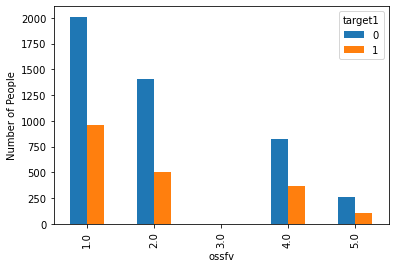

In [660]:
column_list=['hk','bam','ba','bfm','bwh','blg','boh','btf','drh','drs','cmc','cusm','hw','hi','ohve','ohr','ohsfv','osve','osr','ossfv']
for data in column_list:
    pd.crosstab(df[data] , df['target1']).plot(kind="bar")
    plt.ylabel('Number of People')


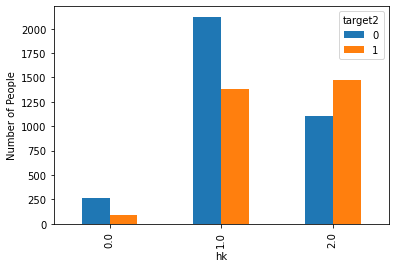

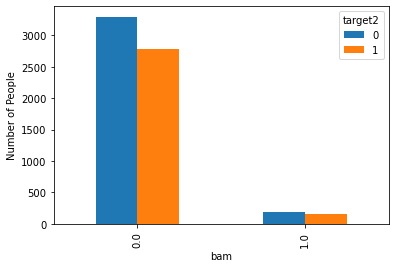

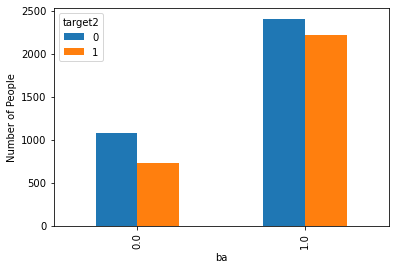

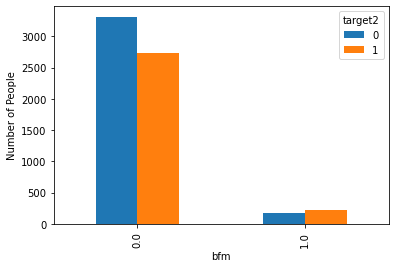

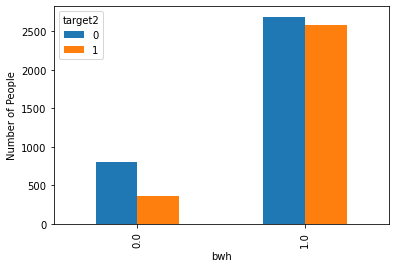

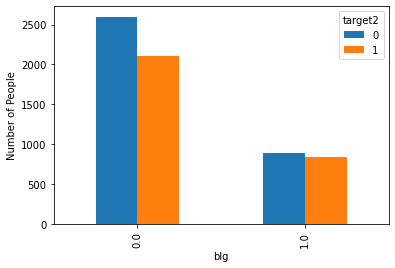

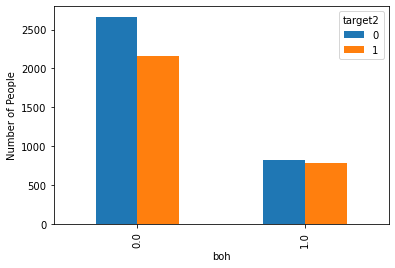

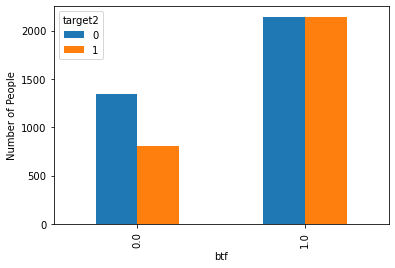

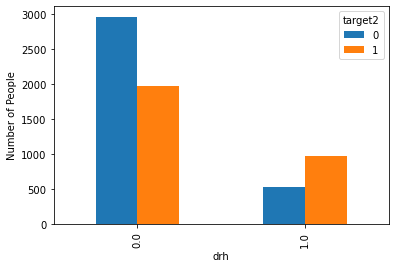

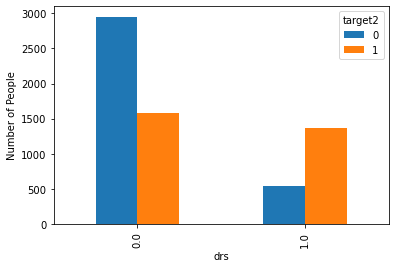

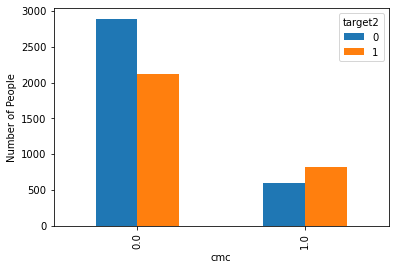

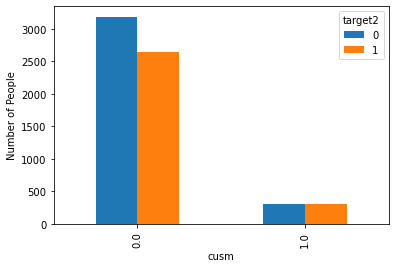

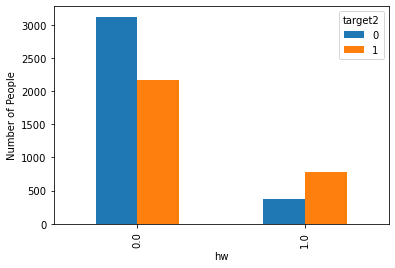

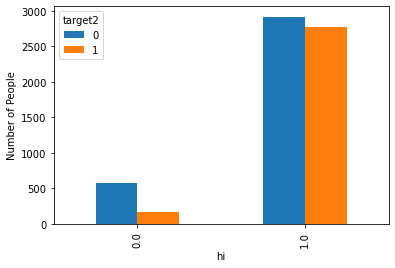

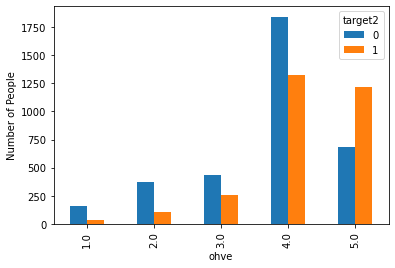

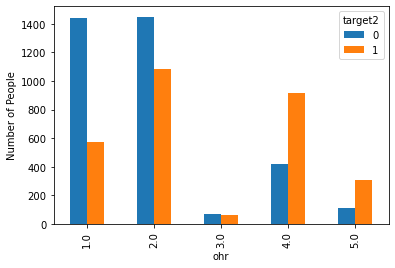

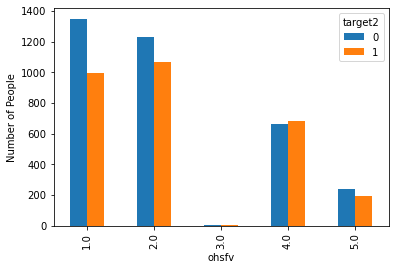

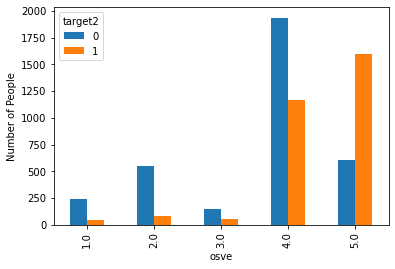

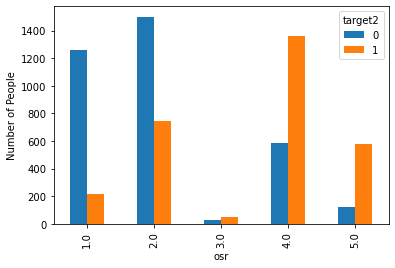

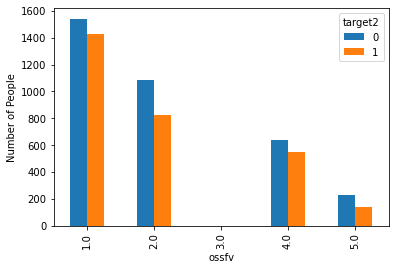

In [661]:
column_list=['hk','bam','ba','bfm','bwh','blg','boh','btf','drh','drs','cmc','cusm','hw','hi','ohve','ohr','ohsfv','osve','osr','ossfv']
for data in column_list:
    pd.crosstab(df[data] , df['target2']).plot(kind="bar")
    plt.ylabel('Number of People')

### Bivariate Analysis
We will pair Target variables against other data

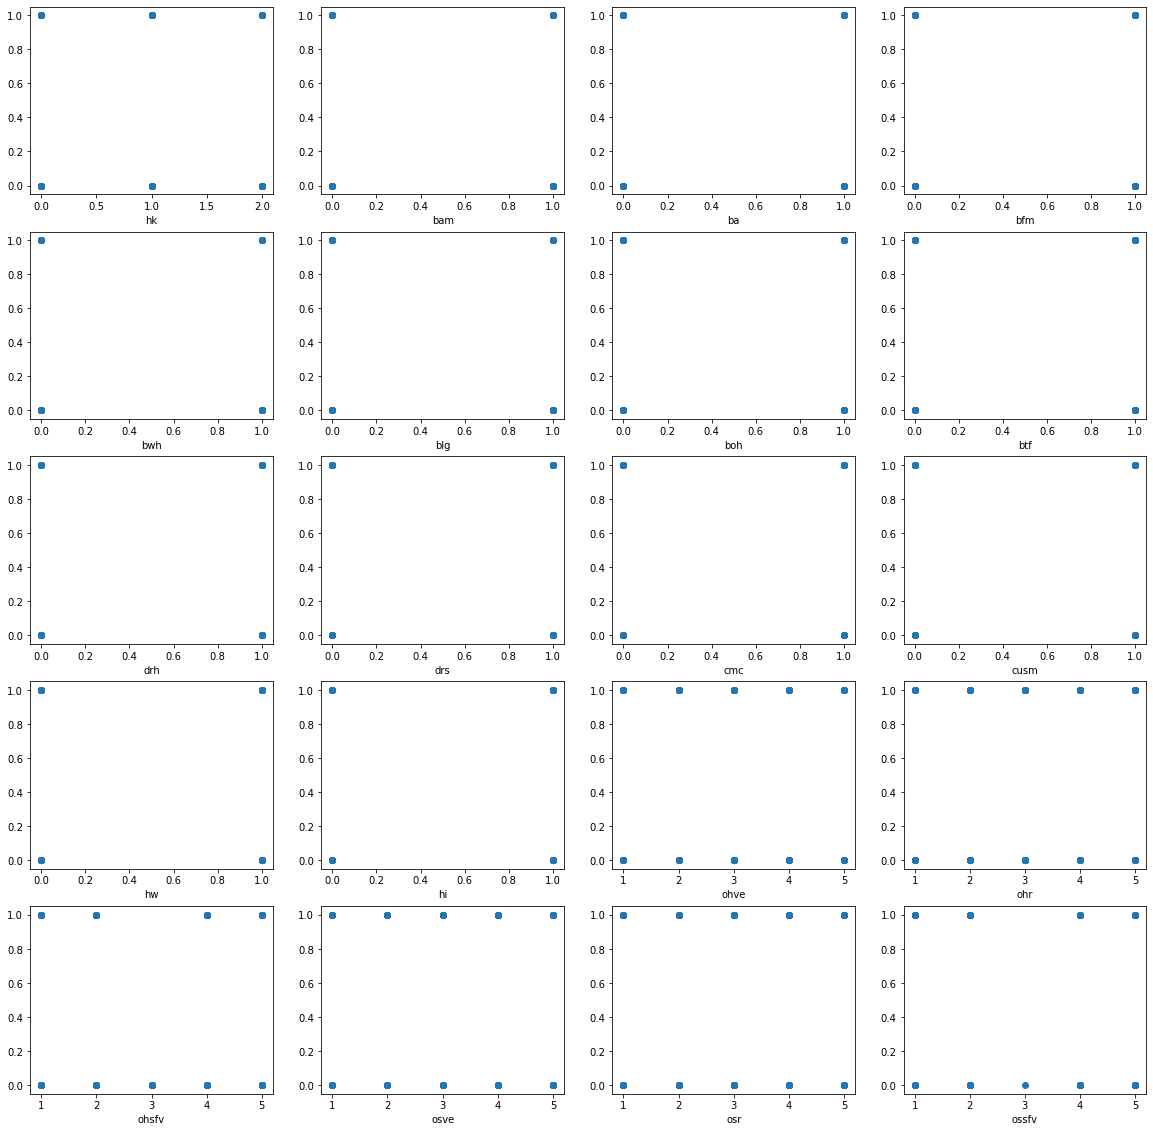

In [662]:
#target1
column_list=['hk','bam','ba','bfm','bwh','blg','boh','btf','drh','drs','cmc','cusm','hw','hi','ohve','ohr','ohsfv','osve','osr','ossfv']
fig , axs = plt.subplots(5,4,figsize=(20,20))

a=0
for i in range(0,5):
    for j in range(0,4):
        axs[i][j].scatter(df[column_list[a]],df.target1)
        axs[i][j].set_xlabel(column_list[a])
        a+=1
        

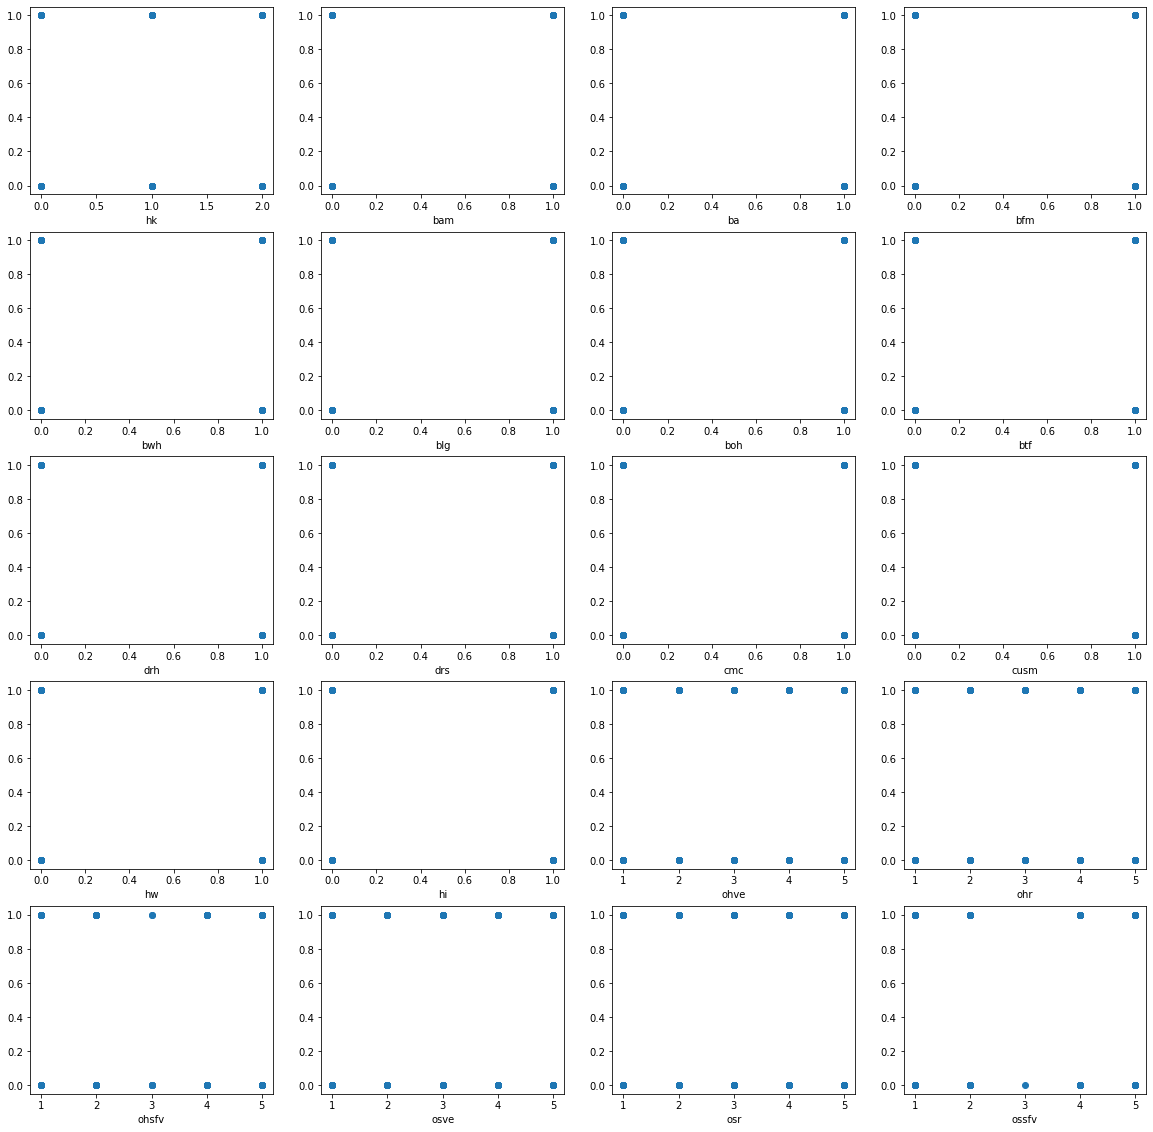

In [663]:
#target2
column_list=['hk','bam','ba','bfm','bwh','blg','boh','btf','drh','drs','cmc','cusm','hw','hi','ohve','ohr','ohsfv','osve','osr','ossfv']
fig , axs = plt.subplots(5,4,figsize=(20,20))

a=0
for i in range(0,5):
    for j in range(0,4):
        axs[i][j].scatter(df[column_list[a]],df.target2)
        axs[i][j].set_xlabel(column_list[a])
        a+=1
        

###  Dealing with outliers

In [664]:
#to preserve accuracy we will not check for outliers

# <font color="brown">Features <font>
We will deal with the important features only , this is done by dropping all the unnecessary values 
   
    

### Dropping the columns

In [665]:
#All the values are zero meaning that all people are employed 
df = df.drop('es' , axis=1)
df = df.drop('id' , axis=1)

### Checking for correlation

[]

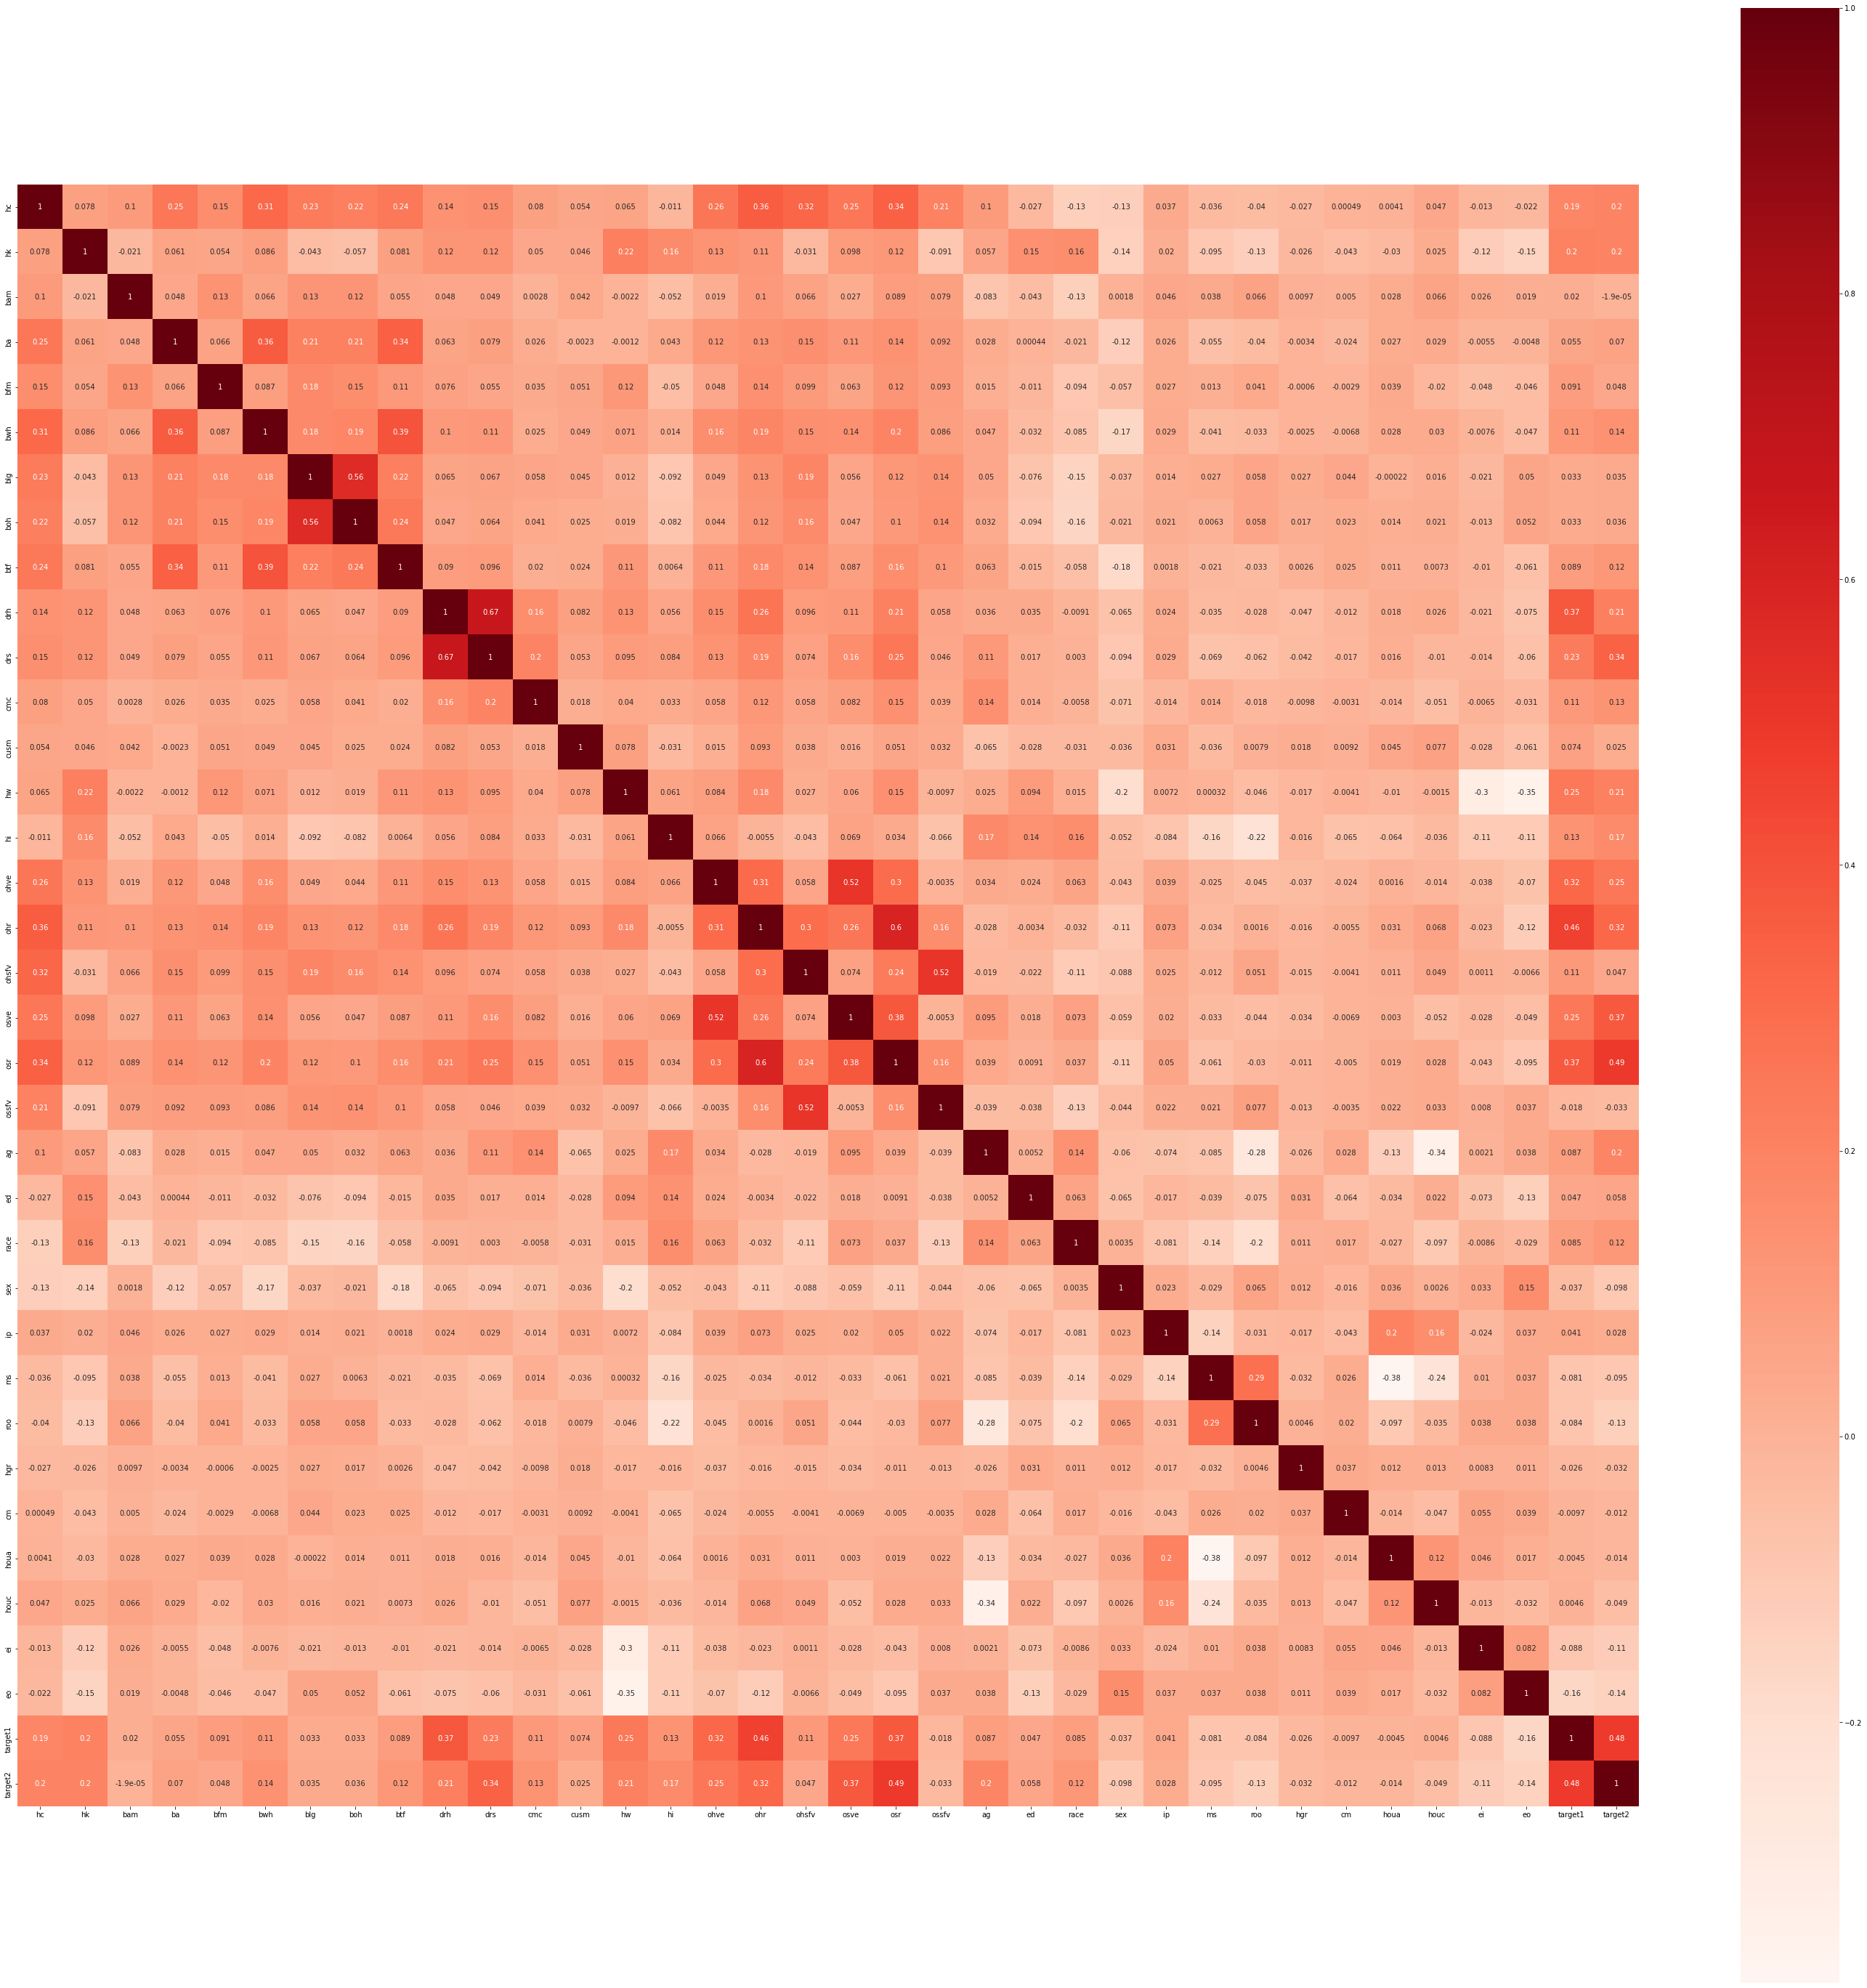

In [666]:
plt.figure(figsize = (50,50))
sns.heatmap(df.corr(), cmap= 'Reds', annot = True , cbar=True , square= True)
plt.plot()

# <font color="brown">Modelling <font>

### Preparing the training and testing data

In [667]:
x= df.drop(['target1','target2'],axis =1 )
y1= df['target1']
y2= df['target2']

In [668]:
x

,hc,hk,bam,ba,bfm,bwh,blg,boh,btf,drh,...,sex,ip,ms,roo,hgr,cm,houa,houc,ei,eo
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,2,1,1,1,0,0.0,0.0,12,19
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0,0,0,0,1,2,2.0,0.0,12,20
10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1,0,0,1,6,0,2.0,0.0,19,13
11,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,1,0,0,8,2,1.0,2.0,19,1
15,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,6,0,1.0,3.0,18,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26681,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,5,0,1.0,0.0,0,0
26683,1.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0,1,0,0,3,0,1.0,0.0,4,2
26690,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,7,1,2.0,1.0,7,11
26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,9,0,1.0,0.0,12,19


In [669]:
y1

1        0
7        1
10       1
11       1
15       0
        ..
26681    0
26683    1
26690    0
26699    0
26703    0
Name: target1, Length: 6437, dtype: int64

In [670]:
y2

1        1
7        1
10       1
11       1
15       0
        ..
26681    0
26683    1
26690    0
26699    0
26703    0
Name: target2, Length: 6437, dtype: int64

In [671]:
#setting up training and testing data
x1_train , x1_test , y1_train , y1_test = train_test_split(x,y1,test_size=0.2 , random_state= 42 )
x2_train , x2_test , y2_train , y2_test = train_test_split(x,y2,test_size=0.2 , random_state= 42 )

### Testing the Models 

In [672]:
# Put Models in a Dictionary
models = {
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    # set random seeds
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

model_scores1 = fit_and_score(models=models, x_train=x1_train, x_test=x1_test, y_train = y1_train, y_test = y1_test)
model_scores2 = fit_and_score(models=models, x_train=x2_train, x_test=x2_test, y_train = y2_train, y_test = y2_test)
#target1
model_scores1

{'Logistic Regression': 0.8268633540372671,
 'KNN': 0.7686335403726708,
 'Random Forest': 0.828416149068323}

In [673]:
#target2
model_scores2

{'Logistic Regression': 0.7919254658385093,
 'KNN': 0.7313664596273292,
 'Random Forest': 0.7950310559006211}

### Hyperparameter tuning

#### Target1

Maximum KNN Score on the test data: 79.58%


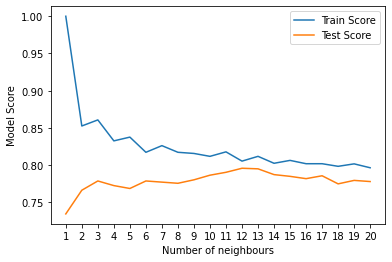

In [674]:
#using elbow method we can increase the efficiency 
train_scores = []
test_scores =[]
neighbors = range(1,21)
knn= KNeighborsClassifier() 

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(x1_train, y1_train)
    train_scores.append(knn.score(x1_train, y1_train))
    test_scores.append(knn.score(x1_test,y1_test))
    
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbours")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN Score on the test data: {max(test_scores)*100:.2f}%")

#### Target2

Maximum KNN Score on the test data: 77.95%


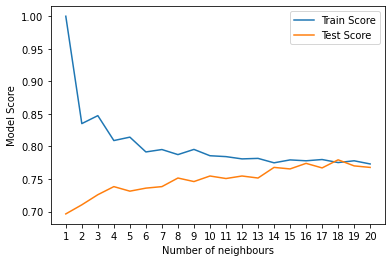

In [675]:
#using elbow method we can increase the efficiency 
train_scores = []
test_scores =[]
neighbors = range(1,21)
knn= KNeighborsClassifier() 

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(x2_train, y2_train)
    train_scores.append(knn.score(x2_train, y2_train))
    test_scores.append(knn.score(x2_test,y2_test))
    
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbours")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN Score on the test data: {max(test_scores)*100:.2f}%")

#### With randomised search 
- Logistic Regression( )
- RandomForest Classifier( ) 

In [676]:
log_reg_grid = {"C":np.logspace(-4, 4, 20),"solver":["liblinear"]}
rf_grid = {"n_estimators":np.arange(10,1000, 50), "max_depth":[None, 3, 5,10],
          "min_samples_split":np.arange(2, 20, 2), "min_samples_leaf":np.arange(1, 20, 2)}
#LogisticRegression
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)
rs_log_reg.fit(x1_train, y1_train)
rs_log_reg.fit(x2_train, y2_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [677]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [678]:
rs_log_reg.score(x1_test, y1_test)

0.7236024844720497

In [679]:
rs_log_reg.score(x2_test, y2_test)

0.7864906832298136

In [680]:
np.random.seed(42)
#RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid,cv=5, n_iter=20,verbose=True)
rs_rf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [681]:
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [682]:
rs_rf.score(x1_test, y1_test)

0.7391304347826086

In [683]:
rs_rf.score(x2_test, y2_test)

0.8020186335403726

### ROC curve and AUC

#### Gridsearch

In [684]:
log_reg_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)
gs_log_reg.fit(x1_train, y1_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


In [685]:
gs_log_reg.best_params_

{'C': 4.281332398719396, 'solver': 'liblinear'}

In [686]:
gs_log_reg.score(x1_test, y1_test)

0.8245341614906833

In [687]:
y1_preds = gs_log_reg.predict(x1_test)

In [688]:
y1_preds

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [689]:
y1_test

21229    0
10134    0
15815    1
9834     1
20839    0
        ..
21621    0
20305    0
26097    1
665      0
22581    1
Name: target1, Length: 1288, dtype: int64

#### target1

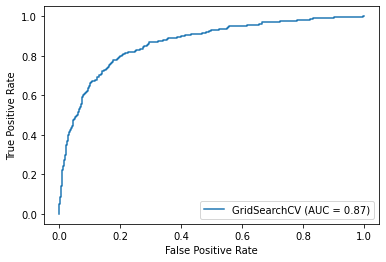

In [690]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gs_log_reg, x1_test, y1_test);

In [691]:
log_reg_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)
gs_log_reg.fit(x2_train, y2_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished


In [692]:
gs_log_reg.best_params_

{'C': 4.281332398719396, 'solver': 'liblinear'}

In [693]:
gs_log_reg.score(x2_test, y2_test)

0.7864906832298136

In [694]:
y2_preds = gs_log_reg.predict(x2_test)

In [695]:
y2_preds

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [696]:
y2_test

21229    1
10134    0
15815    1
9834     1
20839    0
        ..
21621    0
20305    0
26097    1
665      0
22581    1
Name: target2, Length: 1288, dtype: int64

#### target2

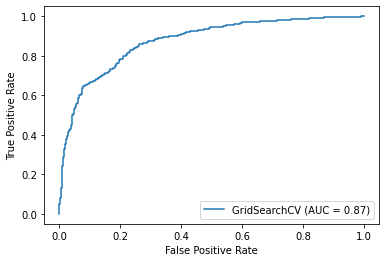

In [697]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gs_log_reg, x2_test, y2_test);

### Confusion Matrix

[[827  84]
 [142 235]]


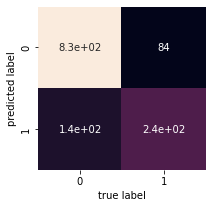

In [698]:
# Display confusion matrix
print(confusion_matrix(y1_test, y1_preds))
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y1_test, y1_preds)

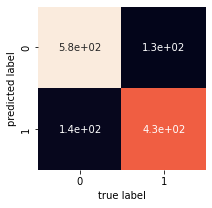

In [699]:
plot_conf_mat(y2_test, y2_preds)

### Classification Report

In [700]:
print(classification_report(y1_test, y1_preds))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       911
           1       0.74      0.62      0.68       377

    accuracy                           0.82      1288
   macro avg       0.80      0.77      0.78      1288
weighted avg       0.82      0.82      0.82      1288



In [701]:
print(classification_report(y2_test, y2_preds))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       716
           1       0.76      0.75      0.76       572

    accuracy                           0.79      1288
   macro avg       0.78      0.78      0.78      1288
weighted avg       0.79      0.79      0.79      1288



In [702]:
gs_log_reg.best_params_

{'C': 4.281332398719396, 'solver': 'liblinear'}

#### Accuracy

In [703]:
# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,solver="liblinear")
# Cross-validated accuracy score
cv_acc1 = cross_val_score(clf,x,y1,cv=5,scoring="accuracy") 
cv_acc1

array([0.8128882 , 0.82298137, 0.82362082, 0.82362082, 0.81895882])

In [704]:
cv_acc2 = cross_val_score(clf,x,y2,cv=5,scoring="accuracy") 
cv_acc2

array([0.77639752, 0.77717391, 0.79331779, 0.79176379, 0.77311577])

In [705]:
cv_acc1 = np.mean(cv_acc1)
cv_acc1

0.8204140062835716

In [706]:
cv_acc2 = np.mean(cv_acc2)
cv_acc2

0.7823537573537573

#### Precision

In [707]:
cv_precision1 = np.mean(cross_val_score(clf, x,y1,cv=5,scoring="precision")) 
cv_precision1

0.7548066519876387

In [708]:
cv_precision2 = np.mean(cross_val_score(clf, x,y2,cv=5,scoring="precision")) 
cv_precision2

0.7744427577819915

#### Recall

In [709]:
cv_recall1 = np.mean(cross_val_score(clf,x,y1,cv=5,scoring="recall"))
cv_recall1

0.5979328165374678

In [710]:
cv_recall2 = np.mean(cross_val_score(clf,x,y2,cv=5,scoring="recall"))
cv_recall2

0.7399890650628759

#### F1

In [711]:
cv_f11 = np.mean(cross_val_score(clf,x,y1,cv=5,scoring="f1"))
cv_f11

0.6666692374435745

In [712]:
cv_f12 = np.mean(cross_val_score(clf,x,y2,cv=5,scoring="f1"))
cv_f12

0.756817724414222

#### Summary

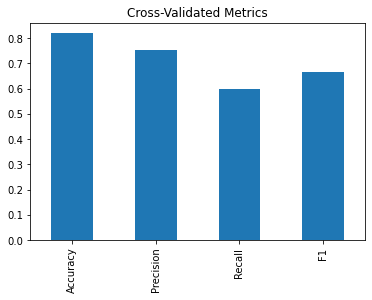

In [713]:
cv_metrics1 = pd.DataFrame({"Accuracy": cv_acc1,"Precision": cv_precision1,"Recall": cv_recall1,"F1": cv_f11},index=[0])
cv_metrics1.T.plot.bar(title="Cross-Validated Metrics", legend=False);

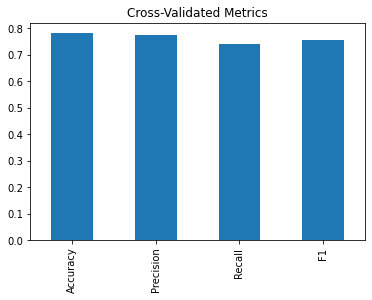

In [714]:
cv_metrics2 = pd.DataFrame({"Accuracy": cv_acc2,"Precision": cv_precision2,"Recall": cv_recall2,"F1": cv_f12},index=[0])
cv_metrics2.T.plot.bar(title="Cross-Validated Metrics", legend=False);

### Feature Importance

#### Target1 Feature importance

In [715]:
clf.fit(x1_train, y1_train);

In [716]:
clf.coef_

array([[ 0.00616359,  0.21954867,  0.13678154, -0.10897851,  0.19517997,
        -0.00301119, -0.13814572,  0.11612288, -0.15479361,  1.77576066,
        -0.43150025,  0.01480855,  0.18898653,  0.63467772,  0.50200947,
         0.38603453,  0.57619196,  0.08170889,  0.07150731,  0.17690987,
        -0.2355625 ,  0.05425171, -0.05533184,  0.02970593,  0.2380694 ,
         0.06196399, -0.35336916, -0.30163653, -0.03137827, -0.01006423,
        -0.19627044, -0.11590166, -0.01596816, -0.03028787]])

In [717]:
features_dict1 = dict(zip(df.columns, list(clf.coef_[0])))
features_dict1

{'hc': 0.0061635893088748195,
 'hk': 0.2195486731424798,
 'bam': 0.13678154452887492,
 'ba': -0.10897851103394227,
 'bfm': 0.19517997114836708,
 'bwh': -0.003011185703690188,
 'blg': -0.13814571788803734,
 'boh': 0.1161228829893232,
 'btf': -0.15479360558261093,
 'drh': 1.7757606561847676,
 'drs': -0.43150025292722055,
 'cmc': 0.014808554472983796,
 'cusm': 0.18898653273271165,
 'hw': 0.6346777221492648,
 'hi': 0.5020094737011201,
 'ohve': 0.3860345276869882,
 'ohr': 0.5761919630517084,
 'ohsfv': 0.08170888761893672,
 'osve': 0.0715073052009419,
 'osr': 0.17690986724277816,
 'ossfv': -0.23556249820171796,
 'ag': 0.05425170872026337,
 'ed': -0.05533183970758804,
 'race': 0.029705926191946674,
 'sex': 0.23806939672151248,
 'ip': 0.06196399302378554,
 'ms': -0.35336916260100737,
 'roo': -0.30163652965148874,
 'hgr': -0.03137826531341526,
 'cm': -0.010064230305629987,
 'houa': -0.1962704381753818,
 'houc': -0.11590166176686185,
 'ei': -0.015968157279943704,
 'eo': -0.03028786518319635}

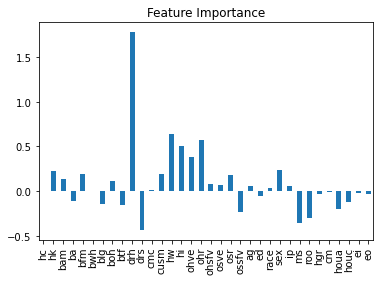

In [718]:
features_df1 = pd.DataFrame(features_dict1, index=[0])
features_df1.T.plot.bar(title="Feature Importance", legend=False);

#### Target2 Feature importance

In [719]:
clf.fit(x2_train, y2_train);

In [720]:
clf.coef_

array([[ 0.05222075,  0.16636223, -0.12167545, -0.21747472, -0.33338528,
         0.13578166, -0.02568733,  0.08625699,  0.10095879, -0.19056255,
         1.30223144,  0.03346316, -0.02356233,  0.52459428,  0.45181865,
        -0.09307802,  0.08976306, -0.09679284,  0.50165355,  0.66944799,
        -0.18015045,  0.19676861, -0.01933676,  0.06620907, -0.03655652,
         0.05228064, -0.20548817, -0.31128937, -0.02376583, -0.01174571,
        -0.1084632 , -0.13217585, -0.03015677, -0.02298139]])

In [721]:
features_dict2 = dict(zip(df.columns, list(clf.coef_[0])))
features_dict2

{'hc': 0.0522207492027316,
 'hk': 0.16636223200349473,
 'bam': -0.12167545021223852,
 'ba': -0.2174747245097507,
 'bfm': -0.3333852839171715,
 'bwh': 0.13578166076402112,
 'blg': -0.025687333898355556,
 'boh': 0.08625698727690123,
 'btf': 0.10095879474697265,
 'drh': -0.19056254786287832,
 'drs': 1.302231444189831,
 'cmc': 0.03346315584770106,
 'cusm': -0.023562333319596507,
 'hw': 0.5245942764294165,
 'hi': 0.4518186547636912,
 'ohve': -0.09307801610205393,
 'ohr': 0.08976306152414115,
 'ohsfv': -0.09679284162744226,
 'osve': 0.5016535544703821,
 'osr': 0.6694479868435808,
 'ossfv': -0.18015045143586295,
 'ag': 0.19676861483432923,
 'ed': -0.01933675553877876,
 'race': 0.06620906831211457,
 'sex': -0.03655652351090273,
 'ip': 0.05228063501453081,
 'ms': -0.20548817194886354,
 'roo': -0.31128936501192717,
 'hgr': -0.023765832591758355,
 'cm': -0.011745708870060722,
 'houa': -0.10846319617994529,
 'houc': -0.13217585067192272,
 'ei': -0.03015677155784494,
 'eo': -0.022981388139255758}

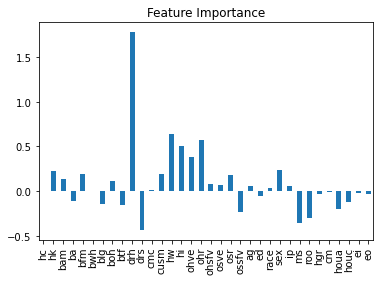

In [722]:
features_df1 = pd.DataFrame(features_dict1, index=[0])
features_df1.T.plot.bar(title="Feature Importance", legend=False);

# Conclusion

We can reliably predict the following with a 87% accuracy